# Решение одномерного нестационарного уравнения теплопроводности

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
N = 2000
M = 2000
T = 86400*365*50
H = 1370
q = 0.01
Q = 0.032

#Задается сетка
x = np.linspace(0, H, N)
t = np.linspace(0, T, M)
d_t = t[1] - t[0]
h = x[1] - x[0]

In [7]:
e = 0.093 #эксцентриситет
a_b = 2.28*10**11 #большая полуось
T = 686.9*86400 #период обращения вокруг Солнца в секундах
R_s = 0.69*10**9 #радиус Солнца в метрах
M_s = 6.32*10**7 #Вт/м^2
sigma_SB = 5.67*10**(-8) #Вт/м^2*К^4 #постоянная Стефана-Больцмана
A = 0.75 #альбедо


def phi1(t):
  h = (1-e)*a_b +2*e*a_b*abs(math.sin(math.pi*t/T))
  E = (R_s/h)**2*M_s
  return (0.25/sigma_SB*(1-A)*E)**(1/4)
  #return 162


#граничное условие второго рода при x=H, t - время, Q - поток тепла к дну льда
def phi2(t):
  return (1/l(H))*Q

#условие в начальный момент времени
def u_0(x):
  return 162 + (18/1370)*x
#  return 0.0926963*x + 233

def l(x):
  return (651/162 + (18/1370)*x)**0.85+2**0.15

def C(x):
  return x*0 +  1300 #среднее геометрическое пыли (800) и льда (2110)

def ro(x):
  return x*0 +  1220


alpha = np.zeros(N)
beta = np.zeros(N)
a=np.zeros(N)
b= np.zeros(N)
c = np.zeros(N)
dzeta = np.zeros((M, N))
u = np.zeros((M, N))

for j in range(N):
  u[0][j] = u_0(x[j]) #условие в начальный момент времени

for n in range(M-1):
  alpha[0] = 0
  beta[0] = phi1(t[n+1]) #левое граничное условие

  for j in range(1, N-1):
    l_i = l(x[j])
    ro_i = ro(x[j])
    c_i = C(x[j])
    sigma = l_i/(ro_i*c_i)
    a[j] = -sigma*d_t/(h*h)
    b[j] = 1 + 2*sigma*d_t/(h*h)
    c[j] = -sigma*d_t/(h*h)
    dzeta[n][j] = u[n][j]
    alpha[j] = -a[j]/(b[j]+c[j]*alpha[j-1])
    beta[j] = (dzeta[n][j] - c[j]*beta[j-1])/(b[j]+c[j]*alpha[j-1])

  u[n+1][N-1] = (h*phi2(t[n+1]) + beta[N-2])/(1-alpha[N-2]) #условие на правой границе phi2(t[n+1])

  for j in range(N-2, -1, -1):
    u[n+1][j] = alpha[j]*u[n+1][j+1] + beta[j]


Построение графика распределения температуры

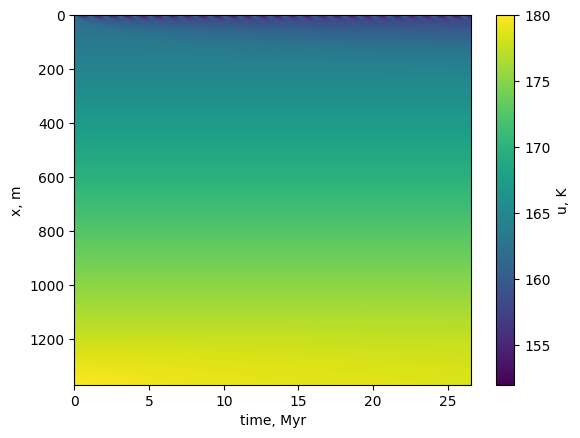

In [8]:
t = t/(86400*686.9)
plt.imshow(u.transpose(),aspect ='auto', extent=[t[0], t[-1], x[-1], x[0]])
plt.xlabel('time, Myr')
plt.ylabel('x, m')
plt.colorbar(label = 'u, K')

Text(0, 0.5, 'x,m')

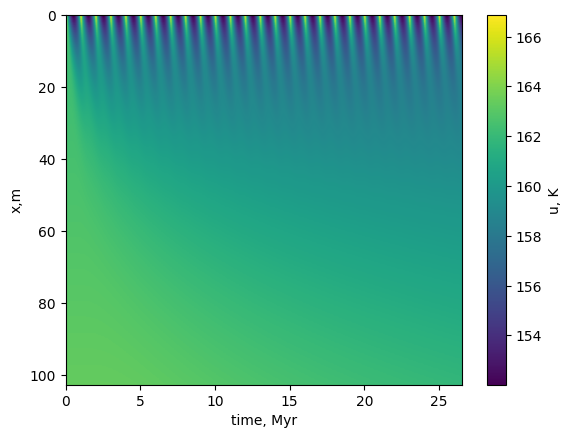

In [9]:
u_time = u[:, :150]
plt.imshow(u_time.transpose(),aspect = 'auto', extent=[t[0], t[-1], x[150], x[0]])
plt.colorbar(label = 'u, K')
plt.xlabel('time, Myr')
plt.ylabel('x,m')

# Зависимость теплопроводности от координаты

In [10]:
#зависимость теплопроводности от координаты для чистого льда и льда с пылью

def lambda2(x, H, dust):
  return (651/(162 + (28/H)*x))**(1-dust) + 2**dust

def lambda_ice(x, H):
   return (651/(162 + (28/H)*x))

Text(0, 0.5, 'теплопроводность, Вт/м*K')

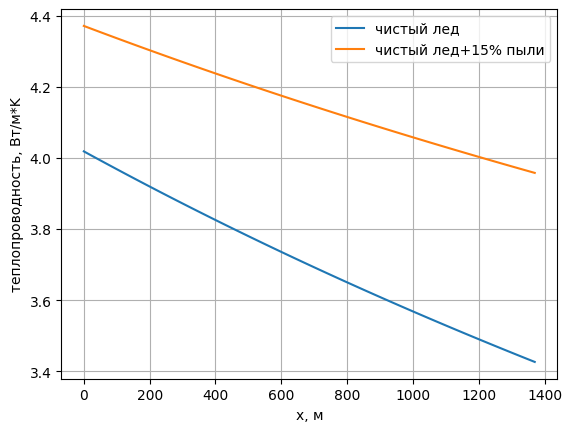

In [11]:
H = 1370
x = np.linspace(0, H, 100)
plt.plot(x, lambda_ice(x, H), label = 'чистый лед')
plt.plot(x, lambda2(x, H, 0.15), label = 'чистый лед+15% пыли')

plt.grid()
plt.legend()
plt.xlabel('x, м')
plt.ylabel('теплопроводность, Вт/м*K')

# Модель Зотикова

In [12]:
H = np.linspace(1, 5000,50)
h=5000

deltas = []
w_v = 0.26*10**(-3)
q_r = 32*10**(-3)
g = 3.71
P = 1
t_v = 162

pi=3.14
ro_l=1220
l=2.1
t = 199

#/* вычисление разности критической толщины льда и толщины льда*/

for dust in (0, 0.15, 0.2,0.5, 0.8):

  delta = []
  for i in range(len(H)):
      a = lambda2(H[i], h, dust)/((800*dust+(1-dust)*1500)*(917**(1-dust)+2500**dust))
      e = (w_v*H[i]/(a*59356800))**0.5
      H_kr=lambda2(H[i], h, dust)*(t-t_v)/q_r*(2/(math.sqrt(2*pi)))*e/(math.erf(e))
      delta.append(H_kr-H[i])

  deltas.append(delta)


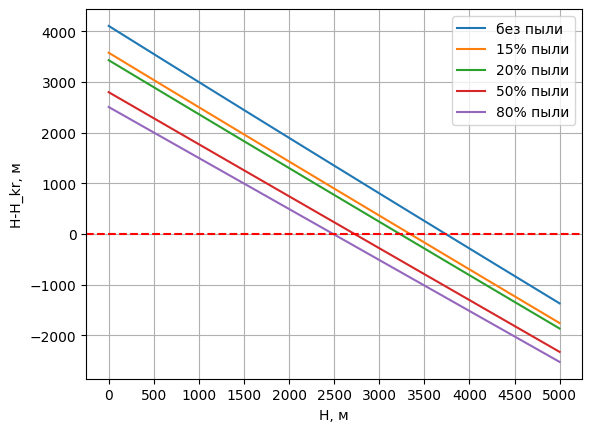

In [13]:
#отрисовка графика
import matplotlib.pyplot as plt
plt.plot(H,deltas[0], label = 'без пыли')
plt.plot(H,deltas[1], label = '15% пыли')
plt.plot(H,deltas[2], label = '20% пыли')
plt.plot(H,deltas[3], label = '50% пыли')
plt.plot(H,deltas[4], label = '80% пыли')
plt.axhline(0, color = 'r', linestyle = '--')
plt.xticks(np.linspace(0, 5000, 11))
plt.ylabel('H-H_kr, м')
plt.xlabel('H, м')
plt.grid()
plt.legend()

# Решение одномерного уравнения теплопроводности

In [ ]:
H = 1370
u = [162, 200]
plt.figure(figsize=(10, 6))
plt.plot([0, 1370], [162, 200], label = "плотный лед, q = 108 мВт/м^2 ")
plt.plot([0, 300, 1370], [162,181, 200], label = "плотный лед+\nодин слой пористого льда, \nq = 66 мВт/м^2")
plt.plot([0, 15, 300, 1370], [162, 170, 186, 200], label = "плотный лед+\nдва слоя пористого льда, \nq = 53 мВт/м^2")
plt.legend()
plt.grid()
plt.xlabel('x, м')
plt.ylabel('u,K')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("один слой")
plt.plot([162, 200],[0, 1370], label = "q = 108 мВт/м^2 ")
plt.plot( [162, 172], [0, 1370],label = "q = 32 мВт/м^2 ")
plt.xlabel("u, K")
plt.ylabel("x, м")
plt.axvline(x=199,c='r', linestyle='dashed')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.title("два слоя")
plt.plot([162,181, 200],[0, 300, 1370], label = "q = 66 мВт/м^2 ")
plt.plot([162, 171, 179],[0, 300, 1370], label = "q = 32 мВт/м^2 ")
plt.xlabel("u, K")
plt.axvline(x=199,c='r', linestyle='dashed')
plt.legend()
plt.grid()


plt.subplot(1, 3, 3)
plt.title("три слоя")
plt.plot( [162, 170, 186, 200],[0, 15, 300, 1370], label = "q = 53 мВт/м^2")
plt.plot( [162, 167, 177, 184],[0, 15, 300, 1370], label = "q = 32 мВт/м^2")
plt.xlabel("u, K")
plt.axvline(x=199,c='r', linestyle='dashed')
plt.legend()
plt.grid()
plt.show()